In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
netflix_df = pd.read_csv("/Users/usamaali/Pictures/Assignment1 data/netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [4]:
# Imputing the missing data for the categorical attributes with undefined
for attr in ['director', 'cast', 'country']:
    netflix_df[attr].fillna('Undefined', inplace=True)
# Dropping the missing data for the numerical values
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

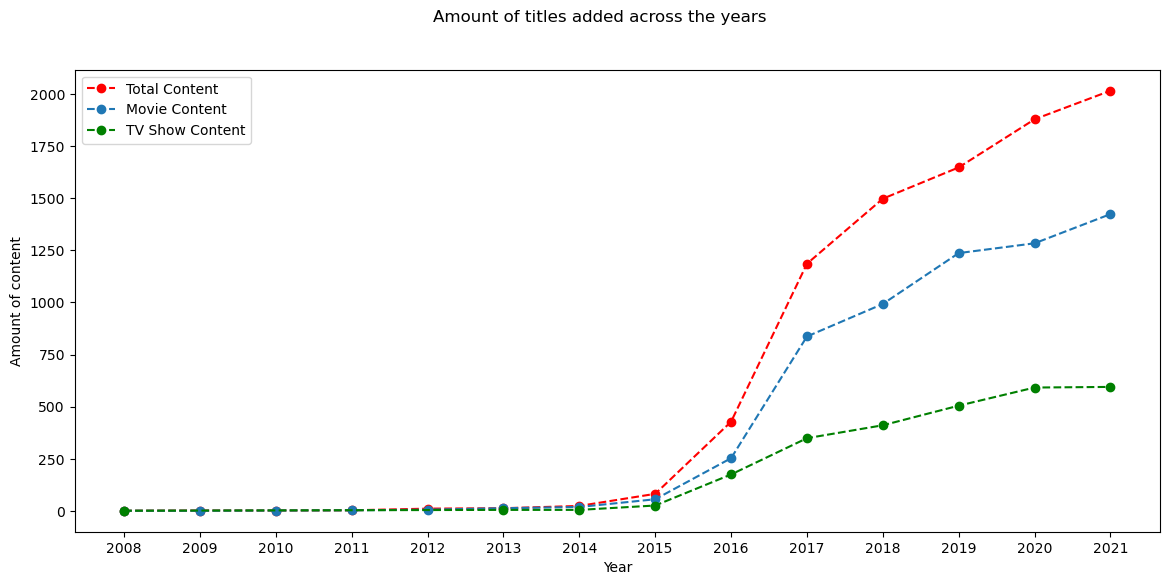

In [5]:
# Adding a new attribute to store the year of adding the content
netflix_df['year'] = netflix_df['date_added'].apply(lambda x: x[-4:])

# Plotting using a line plot 
fig, ax = plt.subplots(figsize=(14,6))
fig.suptitle('Amount of titles added across the years')

# sorted(netflix_df['year'].unique() gives ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
# sorted(netflix_df['year'].value_counts() gives [1, 2, 2, 7, 12, 13, 25, 88, 184, 453, 1297, 1781, 2349]
ax.plot(sorted(netflix_df['year'].unique()), sorted(netflix_df['year'].value_counts()), '--o', c='r', label='Total Content')

movie_df = netflix_df[netflix_df['type'] == 'Movie'] # Movies only
ax.plot(sorted(movie_df['year'].unique()), sorted(movie_df['year'].value_counts()), '--o', label='Movie Content')

tvshow_df = netflix_df[netflix_df['type'] == 'TV Show'] # TV Shows only
ax.plot(sorted(tvshow_df['year'].unique()), sorted(tvshow_df['year'].value_counts()), '--o', c='g', label='TV Show Content')

ax.set_xlabel('Year')
ax.set_ylabel('Amount of content')
plt.legend() # This needs to be written if you wanna display the labels in the left corner
plt.show()